##  Stochastic RNA velocity analysis of Forebrain Glut using scRNAvelo

We use a stochastic version of the model for transcriptional dynamics used in velocyto (developed by the Linnarsson lab and Kharchenko Lab).

RNA velocity reference https://www.nature.com/articles/s41586-018-0414-6 <br>

Files needed: hgForebrainGlut.loom (will be downloaded automatically)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import scvelo as scv
scv.logging.print_version()

Running scvelo 0.1.14 on 2018-12-18 20:40.


In [2]:
scv.settings.set_figure_params('scvelo')

## Load and cleanup the data

In [3]:
adata = scv.read('data/ForebrainGlut/hgForebrainGlut.loom', cleanup=True, sparse=True, cache=True, 
                 backup_url='http://pklab.med.harvard.edu/velocyto/hgForebrainGlut/hgForebrainGlut.loom')
adata.var_names_make_unique()
adata.obs['clusters'] = adata.obs['Clusters']

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
scv.pp.show_proportions(adata)
scv.pp.cleanup(adata, clean='all')

adata

Abundance of ['spliced', 'unspliced', 'ambiguous']: [0.66 0.27 0.07]


AnnData object with n_obs × n_vars = 1720 × 32738 
    obs: 'clusters'
    layers: 'spliced', 'unspliced'

## Preprocess the data

In [5]:
scv.pp.filter_and_normalize(adata, min_counts=40, min_counts_u=20, n_top_genes=3000)

Filtered out 23052 genes that are detected in less than 40 counts (spliced).
Filtered out 2164 genes that are detected in less than 20 counts (unspliced).
Normalized X and spliced/unspliced count data.
Logarithmized X.


In [6]:
scv.pp.moments(adata)

computing neighbors
    finished (0:00:03.58) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:00.42) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


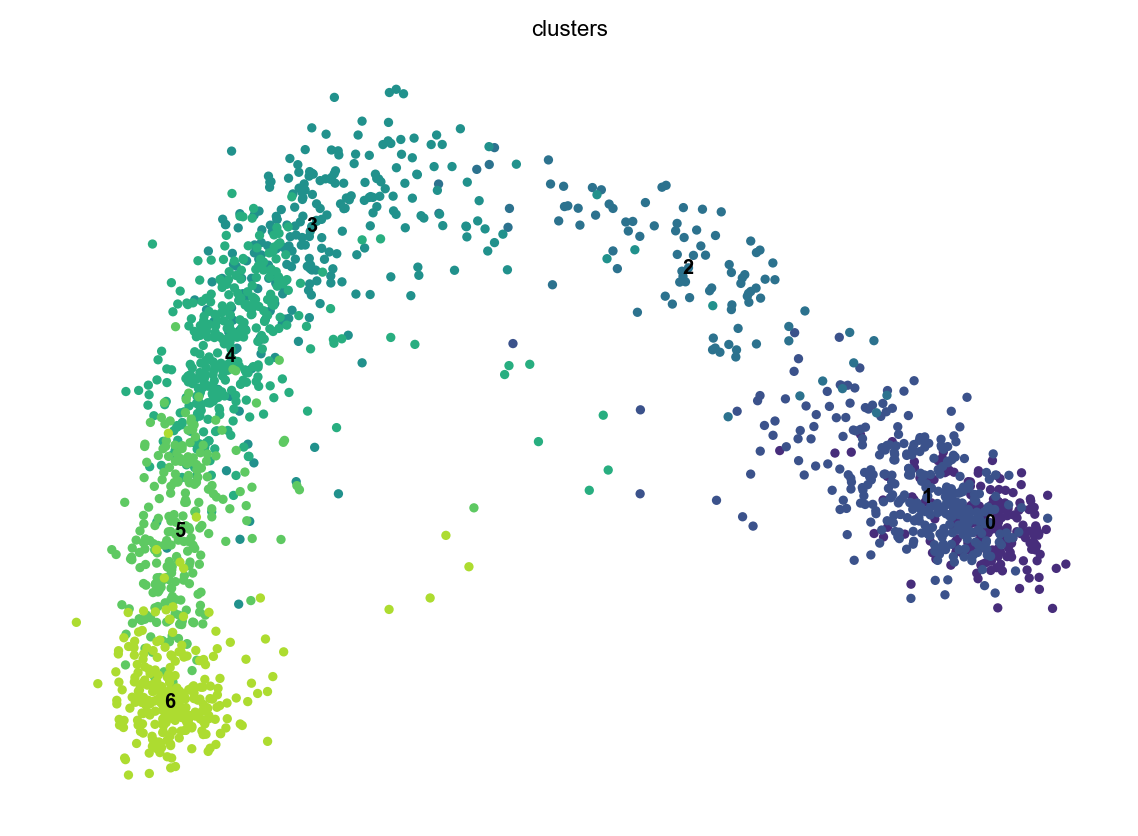

In [132]:
import numpy as np
from matplotlib import colors, cm
vals = np.array(range(len(adata.obs.clusters.cat.categories))) + 1
vals = vals / (vals.max() + 1)
adata.uns['clusters_colors'] = [colors.to_hex(c) for c in cm.get_cmap('viridis')(vals)]

scv.pl.scatter(adata, basis='pca', color='clusters', legend_loc='on data') # use colormap tab20b

## Compute velocity and velocity graph

In [11]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:00.05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [12]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:01.27) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Project the velocity graph onto an embedding

In [13]:
#scv.tl.louvain(adata, resolution=.7, random_state=4)
scv.tl.velocity_embedding(adata, basis='pca')

computing velocity embedding
    finished (0:00:00.34) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


<Figure size 700x500 with 0 Axes>

## Cluster and annotate the data

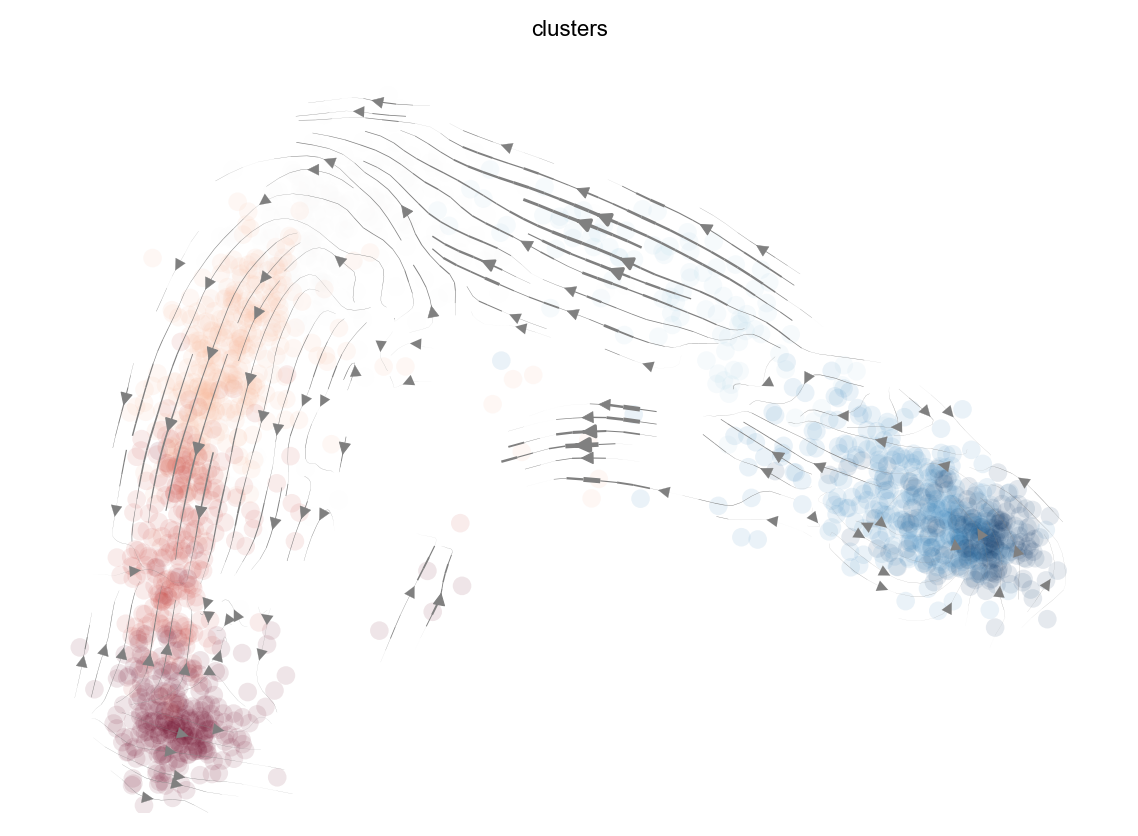

In [17]:
scv.pl.velocity_embedding_stream(adata, basis='pca')

computing terminal states
    identified 3 root cells and 1 end points
    finished (0:00:00.22) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


<Figure size 700x500 with 0 Axes>

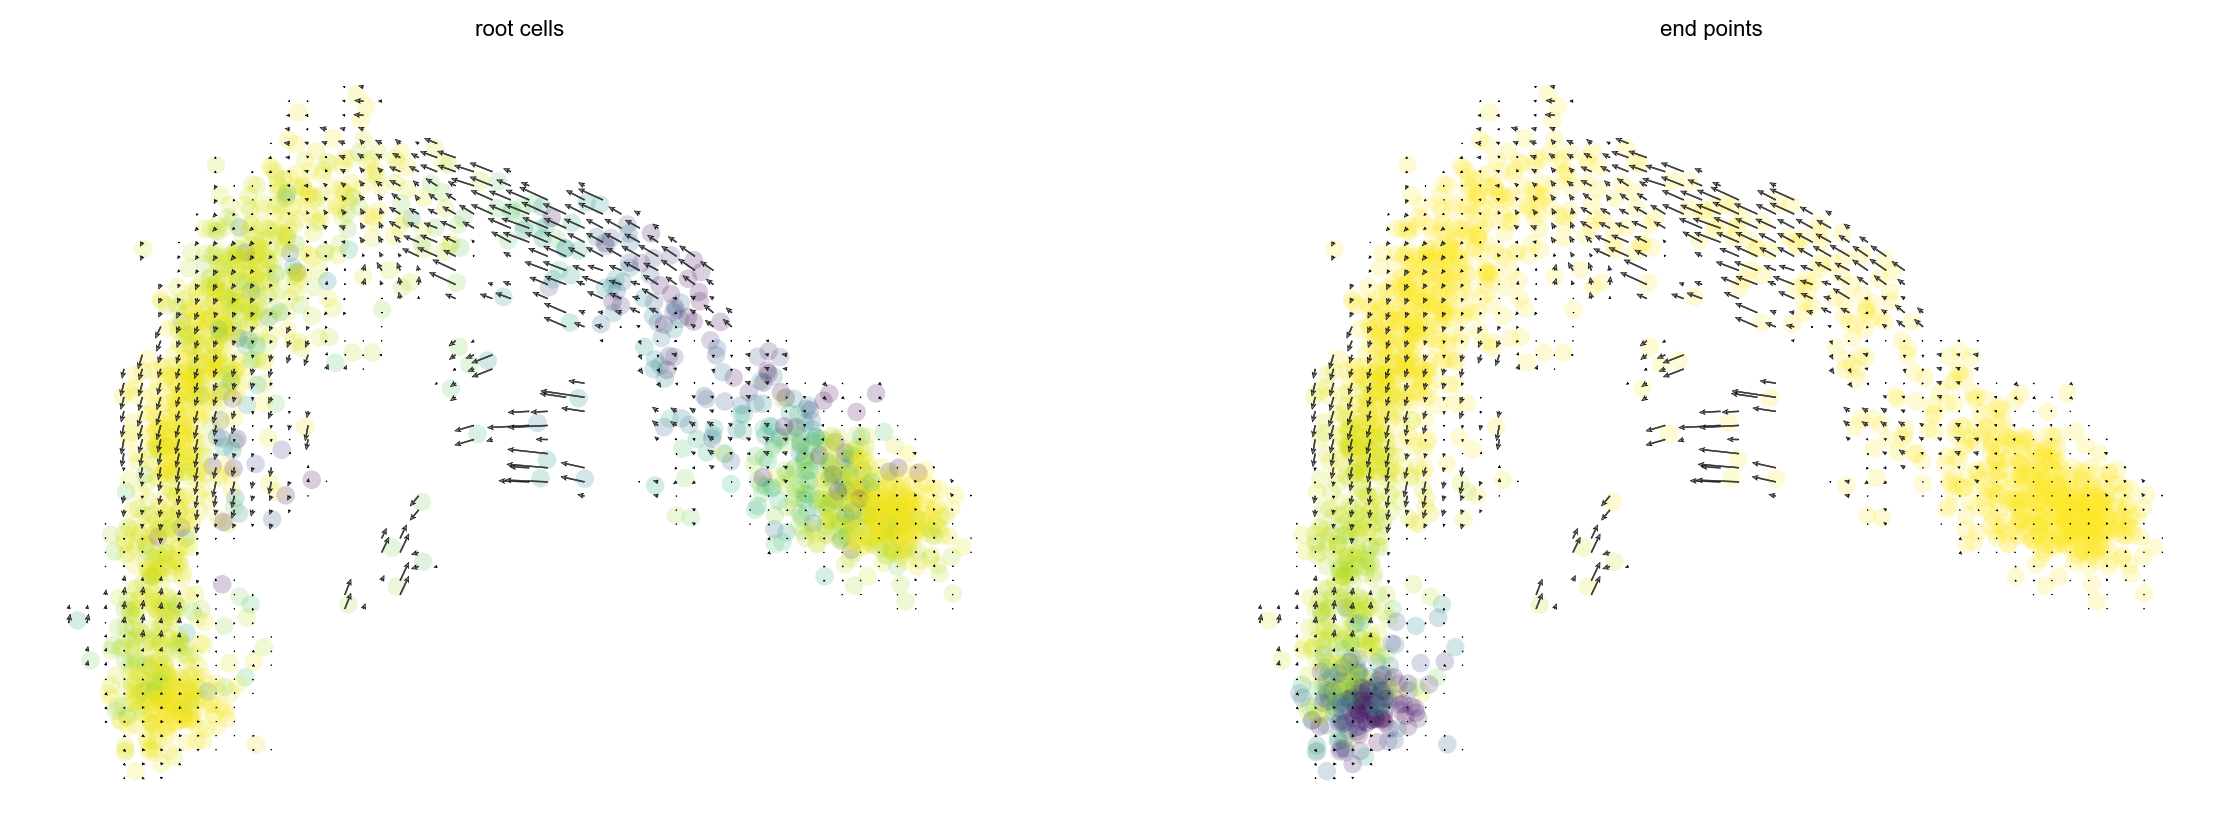

In [15]:
scv.tl.terminal_states(adata)
scv.pl.velocity_embedding_grid(adata, basis='pca', color=['root_cells', 'end_points'])

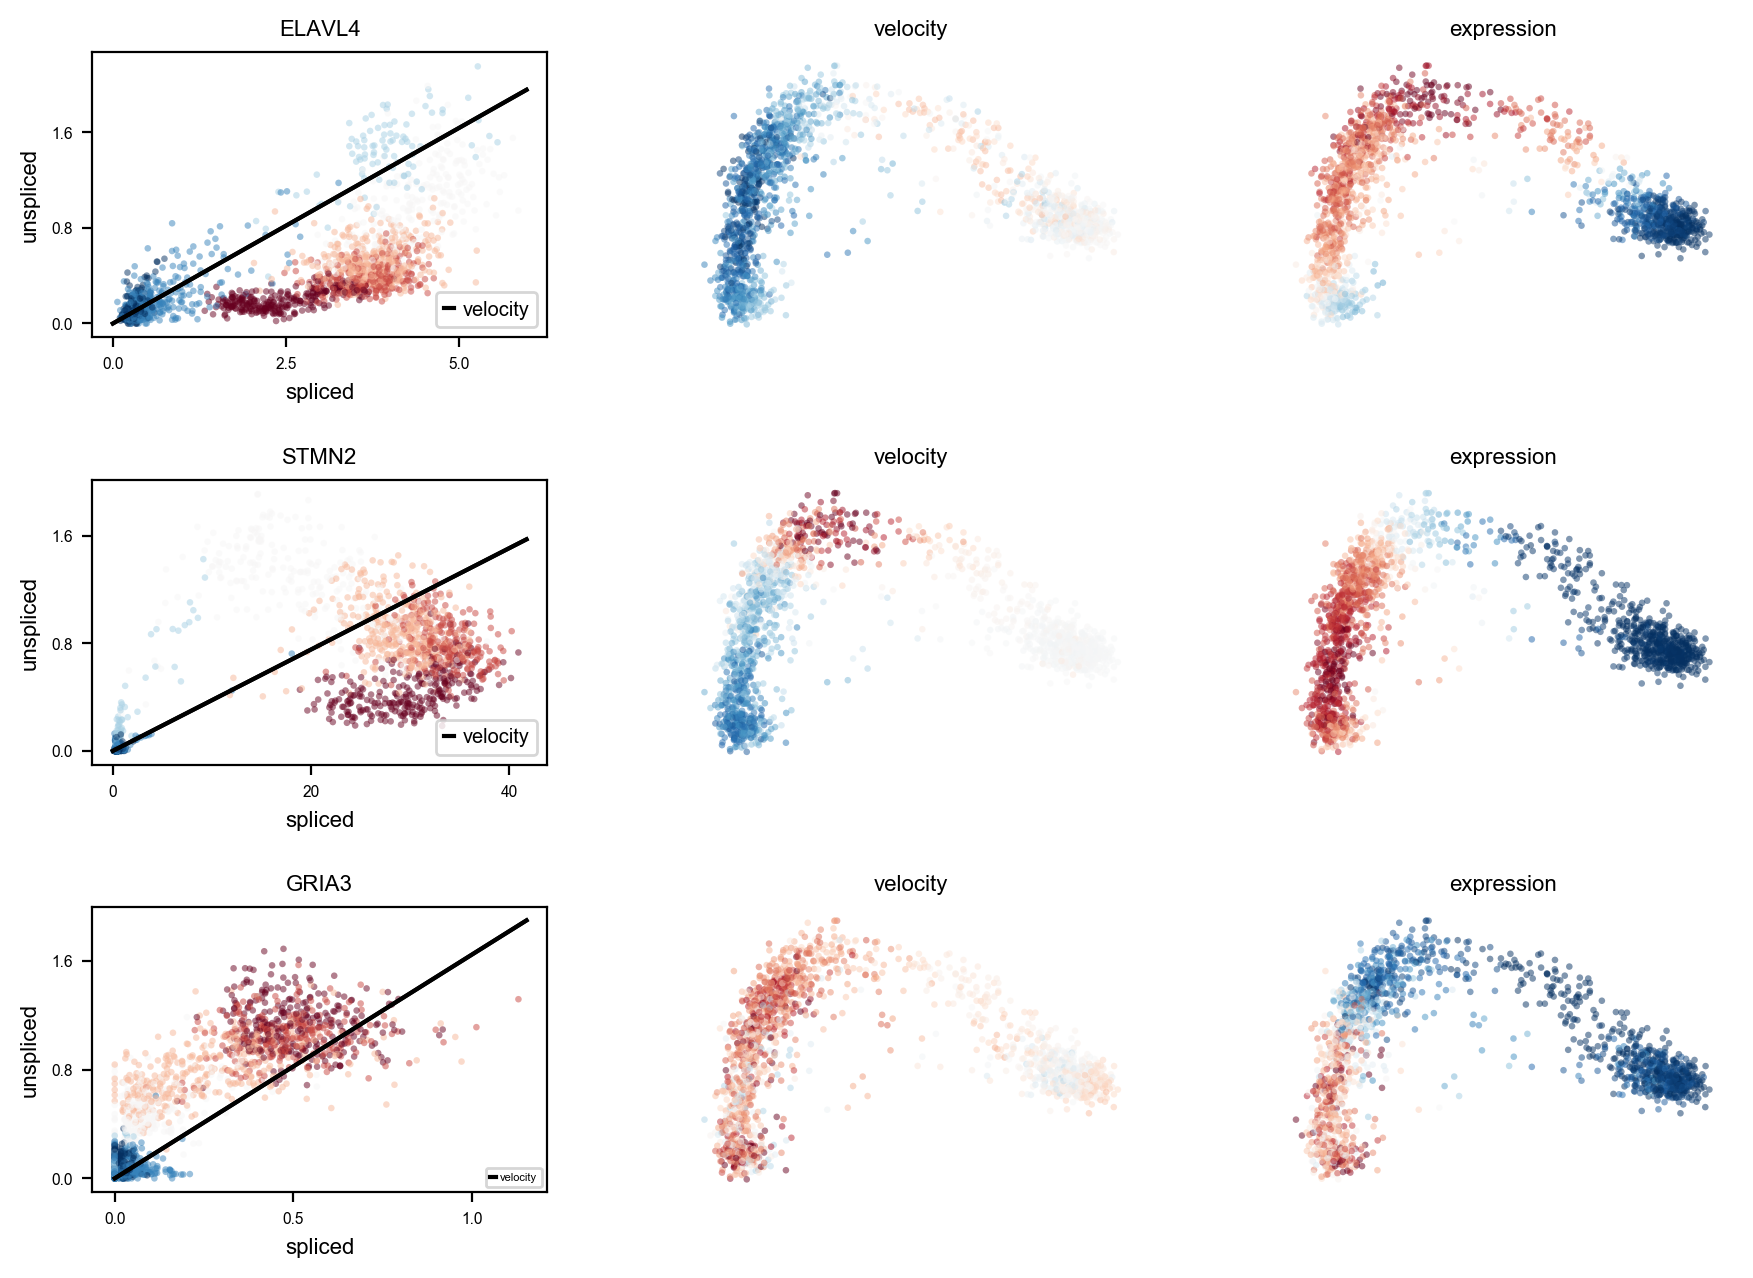

In [42]:
scv.pl.velocity(adata, basis='pca', var_names=["ELAVL4", "STMN2", "GRIA3"])